<a href="https://colab.research.google.com/github/MAR123EREE/Laboratorio_02/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO

In [ ]:
# utilizado para la manipulación de directorios y rutas
import os
# Libreria para graficos
from matplotlib import pyplot

# Cálculo científico y vectorial para python
import numpy as np
# Modulo de optimizacion en scipy
#from scipy import optimize

# modulo para cargar archivos en formato MATLAB
#from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset original

In [ ]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784
# 10 etiquetas, de 0 a 9 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10
# Cargar el dataset MNIST desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Data_sets/Lab_04/mnist_train.csv', delimiter=',')

# Separar los datos de entrada (X) y las etiquetas (y)
X = data.iloc[:, 1:]  # Todas las columnas desde la segunda (datos de píxeles)
y = data.iloc[:, 0]   # La primera columna contiene las etiquetas

# Revisar si el valor 10 está en las etiquetas (no debería estar)
y[y == 10] = 0  # Si encuentras algún 10, reasígnalo como 0
m = y.size

# Mostrar los primeros datos
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ID de la Imagen: Una columna que contenga un identificador único para cada imagen. Esto puede ser útil para rastrear y referenciar imágenes específicas.

Fecha de Creación: Una columna que registre la fecha y hora en que la imagen fue creada o añadida al dataset. Esto puede ser útil para análisis temporales o para mantener un registro histórico.

Fuente del Dato: Una columna que indique la fuente de la imagen, como el dispositivo o la persona que la creó. Esto puede ser útil para análisis de calidad o para entender la variabilidad en los datos.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Crear un DataFrame de ejemplo con las columnas originales de MNIST
data = pd.DataFrame(np.random.randint(0, 256, size=(100, 784)), columns=[f'Pixel{i+1}' for i in range(784)])
data['Label'] = np.random.randint(0, 10, size=(100,))

# Añadir la columna 'ImageID'
data['ImageID'] = [f'{i:05d}' for i in range(len(data))]

# Añadir la columna 'CreationDate'
data['CreationDate'] = [datetime.now().strftime('%Y-%m-%d %H:%M:%S') for _ in range(len(data))]

# Añadir la columna 'DataSource'
data['DataSource'] = np.random.choice(['Scanner1', 'UserA', 'UserB'], size=(100,))

# Reordenar las columnas para que las nuevas estén al principio
mnist_data = data[['ImageID', 'CreationDate', 'DataSource', 'Label'] + [f'Pixel{i+1}' for i in range(784)]]

print(data.head())

   Pixel1  Pixel2  Pixel3  Pixel4  Pixel5  Pixel6  Pixel7  Pixel8  Pixel9  \
0      22       7     182      32     106     178     106      49     239   
1      84     240      18     125     103      43     102       6     125   
2     149     123      98      79     188     179      12     182      44   
3     185       3      18     246     153      27     102      93      61   
4      61      71     125      61     233     117      49     118      86   

   Pixel10  ...  Pixel779  Pixel780  Pixel781  Pixel782  Pixel783  Pixel784  \
0       41  ...       110        53        41        80        70        96   
1      174  ...        60       237       176         7        52       246   
2      121  ...       122        25       124       111        63        17   
3      226  ...       245       147        63       249       131       117   
4       27  ...        53       215       154       150       171       201   

   Label  ImageID         CreationDate  DataSource  
0      1 

In [ ]:
#Define una función llamada displayData que toma tres parámetros: X (los datos a mostrar), example_width (ancho de cada ejemplo) y
#figsize (tamaño de la figura).
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    #Verifica la dimensionalidad de X y ajusta m (número de ejemplos)
    #y n (número de características). Si X es un vector, lo convierte en una matriz bidimensional.
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

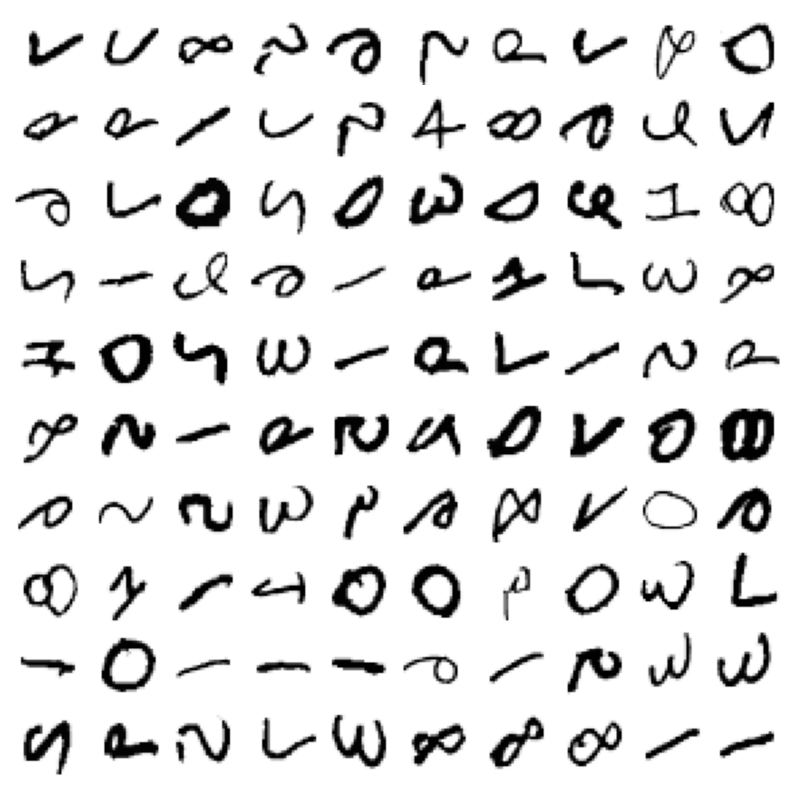

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X.iloc[rand_indices, :].values # Use .iloc to select rows and columns by integer location

displayData(sel)

Orinalmente el dataset era de 8 rows x 784 colums, pero ahora se cambio a 5 x 787, con el agragado que siempre se aumenta automaticamente una columna extra

In [ ]:
data.tail(784)

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,Label,ImageID,CreationDate,DataSource
0,22,7,182,32,106,178,106,49,239,41,...,110,53,41,80,70,96,1,00000,2024-09-19 10:31:25,UserB
1,84,240,18,125,103,43,102,6,125,174,...,60,237,176,7,52,246,4,00001,2024-09-19 10:31:25,UserB
2,149,123,98,79,188,179,12,182,44,121,...,122,25,124,111,63,17,9,00002,2024-09-19 10:31:25,Scanner1
3,185,3,18,246,153,27,102,93,61,226,...,245,147,63,249,131,117,8,00003,2024-09-19 10:31:25,UserB
4,61,71,125,61,233,117,49,118,86,27,...,53,215,154,150,171,201,4,00004,2024-09-19 10:31:25,Scanner1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,96,159,21,146,6,197,2,154,93,...,223,50,28,72,126,50,3,00095,2024-09-19 10:31:25,Scanner1
96,58,162,149,104,21,151,11,57,223,91,...,224,123,36,200,169,169,9,00096,2024-09-19 10:31:25,UserB
97,139,6,183,27,3,49,0,50,159,221,...,72,36,96,132,216,179,4,00097,2024-09-19 10:31:25,Scanner1
98,53,117,135,110,166,4,28,129,165,21,...,36,70,137,2,56,208,4,00098,2024-09-19 10:31:25,UserA


Dataset_sintético

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Cargar MNIST
mnist = fetch_openml('mnist_784')
data = mnist.data
labels = mnist.target

# Crear columnas sintéticas
column1 = np.random.rand(len(data))  # Ejemplo: datos aleatorios
column2 = np.random.randint(0, 100, size=len(data))  # Ejemplo: enteros aleatorios
column3 = np.random.normal(size=len(data))  # Ejemplo: datos con distribución normal

# Crear DataFrame
new_data = pd.DataFrame(data)
new_data['label'] = labels
new_data['synthetic_col1'] = column1
new_data['synthetic_col2'] = column2
new_data['synthetic_col3'] = column3

# Guardar el nuevo dataset
new_data.to_csv('mnist_synthetic.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-1-fc90f0cadf5a>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data['label'] = labels
<ipython-input-1-fc90f0cadf5a>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [ ]:
new_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,synthetic_col1,synthetic_col2,synthetic_col3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0.514560,98,0.438780
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.052756,44,-2.181854
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.758890,53,-0.487219
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.968152,87,-0.536577
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,0.669449,32,1.653756
